# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import statsmodels.api as sm

data = pd.DataFrame(data = pd.read_csv('progresa_sample.csv'))

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [25]:
data1_1 = data.copy()

data1_1.loc[data1_1['poor'] == 'pobre', 'poor'] = 1
data1_1.loc[data1_1['poor'] == 'no pobre', 'poor'] = 0
data1_1.loc[data1_1['progresa'] == 'basal', 'progresa'] = 1
data1_1.loc[data1_1['progresa'] == '0', 'progresa'] = 0
data1_1['poor'] = pd.to_numeric(data1_1['poor'])
data1_1['progresa'] = pd.to_numeric(data1_1['progresa'])

stats = pd.DataFrame({
        'Mean': data1_1.mean(),
        'Median': data1_1.median(),
        'SD': data1_1.std(),
    })
stats[~stats.index.isin(['year','folnum','village'])].sort_index()


,Mean,Median,SD
age,11.366460,11.000000,3.167744
dist_cap,147.674452,132.001494,76.063134
dist_sec,2.418910,2.279000,2.234109
fam_n,7.215715,7.000000,2.352900
grc,3.963537,4.000000,2.499063
grc97,3.705372,4.000000,2.572387
hohage,44.436717,43.000000,11.620372
hohedu,2.768104,2.000000,2.656106
hohsex,0.925185,1.000000,0.263095
hohwag,586.985312,500.000000,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [3]:
data1_2 = data1_1[(data1_1['year'] == 97)&(data1_1['poor'] == 1)]

treatment = data1_2[data1_2['progresa'] == 1]
control = data1_2[data1_2['progresa'] == 0]

p_val = [sp.stats.ttest_ind(treatment[var], control[var], nan_policy = 'omit')[1] for var in treatment.columns]


stats_1_2 = pd.DataFrame({
        'Average value (Treatment villages)': treatment.mean(),
        'Average value (Control villages)': control.mean(),
        'Difference (Treat - Control)': treatment.mean()-control.mean(),
        'p-value': p_val
    })
stats_1_2[~stats_1_2.index.isin(['year','folnum','village','poor','progresa','grc97','sc97'])].sort_index().reset_index().rename(columns={'index':'Variable name'})

/tmp/ipykernel_2005232/1192909550.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  p_val = [sp.stats.ttest_ind(treatment[var], control[var], nan_policy = 'omit')[1] for var in treatment.columns]


,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.716991,10.742023,-0.025032,4.785594e-01
1,dist_cap,150.829074,153.769730,-2.940656,8.415005e-04
2,dist_sec,2.453122,2.507662,-0.054540,3.569843e-02
3,fam_n,7.281327,7.302469,-0.021142,4.271039e-01
4,grc,3.531599,3.543050,-0.011450,6.890151e-01
5,hohage,43.648828,44.276918,-0.628090,1.796243e-06
6,hohedu,2.663139,2.590348,0.072791,1.105093e-02
7,hohsex,0.924656,0.922947,0.001709,5.711858e-01
8,hohwag,544.339544,573.163558,-28.824015,3.253835e-04
9,indig,0.325986,0.332207,-0.006222,2.453603e-01


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

* A: Consider that significant level is 0.05, for distance to capital, distance to nearest secondary school, head of household age, head of household education, head of household wage, min distance to an urban center, sex and welfare index, there are significant differences between treatment and control villages. 8 variables out of 14 have significant differences, the rest do not have significant difference.
* B: If there are differences at baseline, it suggests that the randomization of treatment and control is not perfect, there are preexisting difference between control and treatment group. i.e. the identifying assumption does not hold. 
* C: This implies that we should not expect the end result to be the same in the absence of treatment. We need to set variables with significant difference at baseline to be control variables in order to separate variation due to treatment and variation due to preexisiting difference when we measure the impact of the treatment.

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

/tmp/ipykernel_2005232/567536584.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_1_4['sc'] = before_1_4.groupby('village')['sc'].transform('mean')
/tmp/ipykernel_2005232/567536584.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_1_4['sc'] = after_1_4.groupby('village')['sc'].transform('mean')


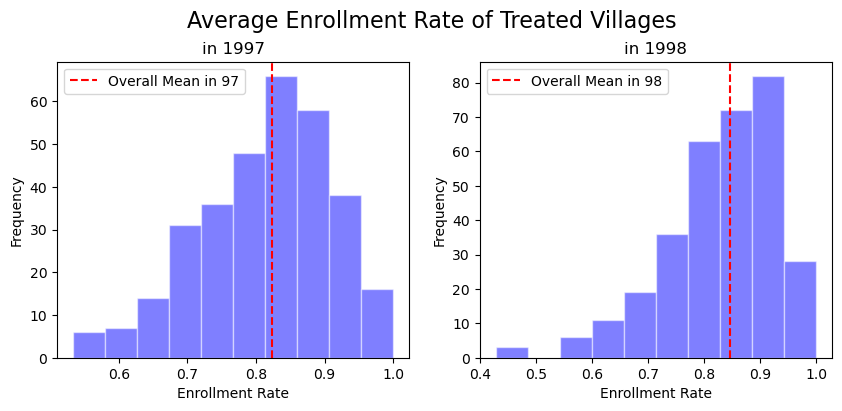

Mean Difference = 0.023782233992046597.
Overall: t-stat = -6.069273929290983  p-val = 1.2976490728161e-09
Grouped: t-stat = -2.015713486515581  p-val = 0.044248700365727124


In [4]:
import matplotlib.pyplot as plt  


before_1_4 = data1_1[(data1_1['year'] == 97)&(data1_1['poor'] == 1) & (data1_1['progresa'] == 1)]
after_1_4 = data1_1[(data1_1['year'] == 98)&(data1_1['poor'] == 1)&(data1_1['progresa']==1)]

treat_mean_before = before_1_4['sc'].mean()
treat_mean_after = after_1_4['sc'].mean()
treat_diff = treat_mean_after-treat_mean_before

t_stat, p_val = sp.stats.ttest_ind(before_1_4['sc'].dropna(), after_1_4['sc'].dropna())

before_1_4['sc'] = before_1_4.groupby('village')['sc'].transform('mean')
before_1_4 = before_1_4.drop_duplicates(subset='village', keep='first')

after_1_4['sc'] = after_1_4.groupby('village')['sc'].transform('mean')
after_1_4 = after_1_4.drop_duplicates(subset='village', keep='first')

t_stat_group, p_val_group = sp.stats.ttest_ind(before_1_4['sc'], after_1_4['sc'])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(before_1_4['sc'], color='blue', alpha=0.5, edgecolor = 'white')
axs[1].hist(after_1_4['sc'], color='blue', alpha=0.5,edgecolor = 'white')


axs[0].axvline(treat_mean_before, color='red',label = 'Overall Mean in 97', linestyle = 'dashed')


axs[1].axvline(treat_mean_after, color='red',label= 'Overall Mean in 98', linestyle = 'dashed')

axs[0].legend()
axs[1].legend()

fig.suptitle('Average Enrollment Rate of Treated Villages', fontsize=16)

plt.subplots_adjust(top=0.85)

axs[0].set_title('in 1997')
axs[1].set_title('in 1998')
for ax in axs:
    ax.set_xlabel('Enrollment Rate')
    ax.set_ylabel('Frequency')

plt.show()

print('Mean Difference = {}.'.format(treat_diff))
print('Overall: t-stat = {}  p-val = {}'.format(t_stat,p_val))
print('Grouped: t-stat = {}  p-val = {}'.format(t_stat_group,p_val_group))

We could see that the difference between the mean enrollment rate between 1998 and 1997 is 0.0238. There is a difference.

Consider that we are doing a pre and post design (limited by the scope of our data), we assume that the outcome in treated villages would be the same from 97 to 98 in absence of progresa.

We would do a t-test on all recorded treated household enrollment rate between 1997 and 1998, the t-stat is -6.0693 and the p-val is 1.2976e-09
Hence we could conclude that the difference is significant under alpha of 0.05.

(In case that we might want to compare difference between village means, we have t-stat = -2.0157, p-val = 0.0442, as p-val still < 0.05, we have same conclusion as if we are comparing overall enrollment rate)

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

/tmp/ipykernel_2005232/1998367961.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_1_5['sc'] = before_1_5.groupby('village')['sc'].transform('mean')
/tmp/ipykernel_2005232/1998367961.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_1_5['sc'] = after_1_5.groupby('village')['sc'].transform('mean')


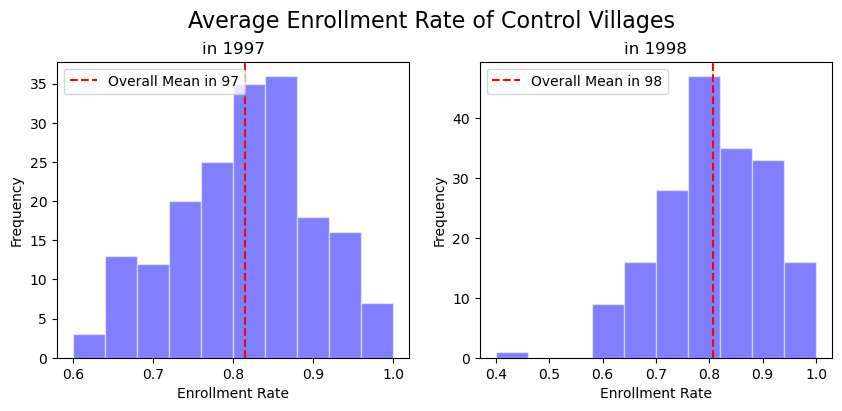

Mean Difference = -0.007549046327276487.
Overall: t-stat = 1.4355850984946787  p-val = 0.1511345297015608
Grouped: t-stat = 0.7816669784862407  p-val = 0.43491292017496097
DiD = 0.031331280319323085
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.76e-18
Time:                        00:43:23   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
           

In [5]:
before_1_5 = data1_1[(data1_1['year'] == 97)&(data1_1['poor'] == 1)&(data1_1['progresa']==0)]
after_1_5 = data1_1[(data1_1['year'] == 98)&(data1_1['poor'] == 1)&(data1_1['progresa']==0)]

control_mean_before = before_1_5['sc'].mean()
control_mean_after = after_1_5['sc'].mean()
control_diff = control_mean_after-control_mean_before

t_stat, p_val = sp.stats.ttest_ind(before_1_5['sc'].dropna(), after_1_5['sc'].dropna())

before_1_5['sc'] = before_1_5.groupby('village')['sc'].transform('mean')
before_1_5 = before_1_5.drop_duplicates(subset='village', keep='first')

after_1_5['sc'] = after_1_5.groupby('village')['sc'].transform('mean')
after_1_5 = after_1_5.drop_duplicates(subset='village', keep='first')

t_stat_group, p_val_group = sp.stats.ttest_ind(before_1_5['sc'], after_1_5['sc'])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(before_1_5['sc'], color='blue', alpha=0.5, edgecolor = 'white')
axs[1].hist(after_1_5['sc'], color='blue', alpha=0.5,edgecolor = 'white')


axs[0].axvline(control_mean_before, color='red',label = 'Overall Mean in 97', linestyle = 'dashed')


axs[1].axvline(control_mean_after, color='red',label= 'Overall Mean in 98', linestyle = 'dashed')

axs[0].legend()
axs[1].legend()

fig.suptitle('Average Enrollment Rate of Control Villages', fontsize=16)

plt.subplots_adjust(top=0.85)

axs[0].set_title('in 1997')
axs[1].set_title('in 1998')
for ax in axs:
    ax.set_xlabel('Enrollment Rate')
    ax.set_ylabel('Frequency')

plt.show()

print('Mean Difference = {}.'.format(control_diff))
print('Overall: t-stat = {}  p-val = {}'.format(t_stat,p_val))
print('Grouped: t-stat = {}  p-val = {}'.format(t_stat_group,p_val_group))
print('DiD = {}'.format(treat_diff-control_diff))


import statsmodels.formula.api as smf
model = smf.ols(formula='sc ~ C(progresa) * C(year)', data=data[data['poor'] == 'pobre']).fit()
print(model.summary())

We could see that the difference between the mean enrollment rate between 1998 and 1997 is -0.0075. The difference is small and also negative compare to 1.4. 

Under the simple pre-post design, we have t-stat = 1.4356, p-val = 0.1511, under alpha of 0.05, there is no significant difference.

(T test on village means have t-stat = 0.7817, p-val = 0.4349, same conclusion).

However, now that we have more data, we could use a double difference design, assuming that the trends in treated and control villages would be the same from 97 to 98 in absence of progresa, we would measure impact of Progresa by the difference of difference in time between control and treated villages.

We could hand calculate that the difference in difference is 0.0313.

We would do a regression to assess the statistical significance of DiD.
Observing the summary of model, We could see the DiD we need is the coefficient of interaction term between year and progresa: 0.0313, close to our hand-calculated value.
And the p value is at most 0.0004, hence we could conclude that the DiD is also significant under alpha of 0.05.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [6]:
import statsmodels.formula.api as smf
data = pd.DataFrame(data = pd.read_csv('progresa_sample.csv'))

data2 = data[data['poor'] == 'pobre']

In [7]:
treated_98 = data2[(data2['progresa']=='basal') & (data2['year']==98)]
control_98 = data2[(data2['progresa']=='0') & (data2['year']==98)]
difference_98 = treated_98['sc'].mean()-control_98['sc'].mean()


t_stat, p_val = sp.stats.ttest_ind(treated_98['sc'].dropna(), control_98['sc'].dropna())

print('average enrollment rate of treated village = {}; control village = {}'.format(treated_98['sc'].mean(), control_98['sc'].mean()))
print('difference in 98 = {}'.format(difference_98))
print('t-stat = {} p-val = {}'.format(t_stat, p_val))

average enrollment rate of treated village = 0.8464791213954308; control village = 0.807636956730308
difference in 98 = 0.0388421646651228
t-stat = 8.358720567418374 p-val = 6.636344447523235e-17


The difference of average enrollment rate between treatment poor households and control poor households is 0.0388. 

Assuming alpha is 0.05, since the t-test generates a t-stat of 8.3587, a p-value of 6.6363e-17, we conclude that the difference is statistically significant.

With key identifying assumption satisfied, the progresa is effective in increasing average enrollment rate. However, difference in baseline we found in 1.2 suggests that the identifying assumption not necessarily hold

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that a person with no technical background could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [8]:
data2_2 = data2[data2['year'] == 98]

In [9]:
model1 = smf.ols(formula='sc ~ C(progresa)', data=data2_2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           6.64e-17
Time:                        00:43:23   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8076 

* Based on this model, treated by Progresa increase the likelihood of a poor household child enrolling by 3.88%, from 80.76% to 84.64%.
* The regression estimate ($\hat{\beta} = 0.0388$, $t = 8.359$) is identical to the t-test estimate in 2.1 ($\hat{\beta} = 0.0388$, $t = 8.359$). They both have very low p-value.
* Yes, assume an $\alpha$ of 0.05 based on the p-value of at most 0.0004(shows 0.000 in summary table), we could reject the null hypothesis that the treatment effects are zero.
* The counterfactual assumption is that the average enrollment rate would be the same across poor households without the presence of treatment (Progresa).

### 2.3 Multiple Regression

Estimate the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [10]:
model2 = smf.ols(formula='sc ~ C(progresa) + age + dist_sec + C(sex) + hohedu + welfare_index + C(indig)', data=data2_2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:43:24   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.5025 

* The controls make the point estimate of treatment effect (Progresa) decreased from 0.0388 to 0.0352.
* It also makes the standard error decreased from 0.005 to 0.004.
* Consider that the estimate of treatment decreases, that is due to a part of variation in our dependent that is explained by treatment in model 2.2 is now correctedly explained by some of the control variable. We decrease the bias of our previous estimation. (We recognize that some of our control variables is correlated with treatment.) Also by controlling other variables, we have a more precise estimation of our treatment effect. Therefore, the estimate of treatment is lower and more precise in model 2.3. 
* The coef of dist_sec is -0.0117, meaning holding all others constant, one unit increase of dist_sec is correlated with 0.0117 decrease of educational attainment. This is not a evidence of causal impact, since our experiment only manipulates (randamized) Progresa variable, there is no causal inference that we can make about dist_sec on educational attainment without further data. It is very possible that dist_sec have unobserved correlation with other variables.

### 2.4 Multiple Regression Revisited

For the same set of control variables that you used in 2.3, carry out the following alternative estimation procedure. 

* First, regress the 1998 enrollment of the poor on the control variables, **without including the treatment assignment.** 
* Second, use this model to obtain predicted values of the 1998 enrollment for each child in the sample used to estimate the model in step 1. 
* Third, compute a new value for each child, which is the difference between the actual 1998 enrollment and the predicted enrollment value from step 2. 
* Finally, regress the difference from step 3 on treatment assignment.

Compare the point estimate and the standard error on treatment assignment that you obtained in step 4 to their analogues in 2.3. Explain the results.

In [11]:
model3 = smf.ols(formula='sc ~ age + dist_sec + C(sex) + hohedu + welfare_index + C(indig)', data=data2_2).fit()

pred2_4 = model3.predict(sm.add_constant(data2_2[['age','dist_sec','sex','hohedu','welfare_index','indig']]))
                          
devia2_4 = data2_2['sc'] - pred2_4

combined_data = data2_2
combined_data['devia'] = devia2_4
                          
model4 = smf.ols(formula='devia~ C(progresa)', data=combined_data).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  devia   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     77.36
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.50e-18
Time:                        00:43:25   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.528e+04
Df Residuals:                   27265   BIC:                         1.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0219 

/tmp/ipykernel_2005232/2217924201.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['devia'] = devia2_4


The point estimate and the standard error is exactly the same compare to their analogues in model 2.3. 
In model 2.3, the coefficient of treatment represents the amount of variation in depedent that is explained by treatment partialling out the effect of controls.

In 2.4, the residuals (difference calculated in step 3) represent the variation in dependent variable that's not explained by the control variables. Then the coefficient of the treatment in the second regression represents the amount of variation in dependent explained by treatment, they are exactly the same thing so they have the same point estimate and standard error.

### 2.5 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


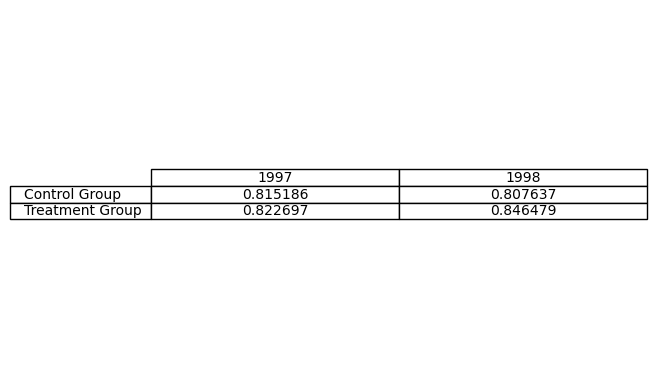

0.031331280319323085


In [13]:
data2_5 = {'1997': [round(control_mean_before,6), round(treat_mean_before,6)],
        '1998': [round(control_mean_after,6), round(treat_mean_after,6)]}
df2_5 = pd.DataFrame(data2_5, index=['Control Group', 'Treatment Group'])

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df2_5.values, colLabels=df2_5.columns, rowLabels=df2_5.index, cellLoc = 'center', loc='center')

plt.show()

print((treat_mean_after-treat_mean_before)-(control_mean_after-control_mean_before))

* The DiD estimate of the impact is 0.03133, lower than that I got from the simple difference result.
* The counterfactual assumption is that the trends in treated and control villages would be the same from 97 to 98 in absence of progresa.

### 2.6 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [14]:
model5 = smf.ols(formula = "sc ~ C(progresa)*C(year)", data = data2).fit()
print(model5.summary())


model6 = smf.ols(formula='sc ~ C(progresa)*C(year) + age + dist_sec + C(sex) + hohedu + welfare_index + C(indig)', data=data2).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.76e-18
Time:                        00:44:51   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

* The estimate (i) of the impact is 0.0313 with a sd of 0.006. This could be interpreted as being treated by Progresa increases the enrollment rate by 3.13% for poor households. The standard error represents the variability of our point estimate, in this case it is relatively very small compare to our estimate (about 1/50 estimate), so we could conclude that our point estimate is fairly precise. The p value of at most 0.0004 indicates that we could reject the null that Progresa have no impact. The coefficient of year is -0.0075, it could be interpreted as a household in control group have 0.75% less likelihood of enrolled in college in 1998 compared to 1997, the coefficient of progresa is 0.0075, it could be interpreted as a household have 0.75% more likelihood of enrolled in college in a treatment group of Progresa in 1997 compare to a household in control group in 1997. However, the two latter coefficients correspond to p values larger than 0.05, denoting that their effect is not significant.
* After I added control variables, the point estimate of the impact decreased to 0.0309 with the same sd of 0.006. The decrease of estimate could be explained by some of the variation in enrollment rate is explained by the control variables, suggesting mild (since the decrease is small) colinearity between treatment and controls. The lack of change of sd might be due to the decrease of sd that usually happens when adding control variables is countered by the colinearity between some controls and the treatment which would increase sd.
* The estimate (i) is exactly the same as our DiD estimate in 2.5, the estimate (ii) is slightly smaller and the reason is possibly due to colinearity between some controls and treatment.
* The counterfactual assumption is that holding all control variables constant, the trends in treated and control villages would be the same from 97 to 98 in absence of progresa.

### 2.7 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [21]:
model7 = smf.ols(formula = 'sc~ C(progresa)*C(year)', data = data[data['poor'] == 'no pobre']).fit()
print(model7.summary()) 

model8 = smf.ols(formula = 'sc~ C(progresa)*C(year) + age + dist_sec + C(sex) + hohedu + welfare_index + C(indig)', data = data[data['poor'] == 'no pobre']).fit()
print(model8.summary()) 

welfare_var = ['dist_sec','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index']

beta = [smf.ols(formula = f'{var}~C(progresa)*C(year)', data = data[data['poor'] == 'pobre']).fit().params[3] for var in welfare_var]
wel_p = [smf.ols(formula = f'{var}~C(progresa)*C(year)', data = data[data['poor'] == 'pobre']).fit().pvalues[3] for var in welfare_var]

impacts = pd.DataFrame({
    'Variable Name': welfare_var,
    'Coeff of Impact': beta,
    'P values':wel_p
})

print('\n')
print(impacts)

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           0.000276
Time:                        01:23:13   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

* It seems that Progresa does not have a significant impact on school enrollment of non-poor, base on the regression table from doing multiple regression on school enrollment rate of the non-poor households, our point estimate is very small in magnitude and it's sd is larger than the estimate itself. The p-value is 0.998, suggesting that we fail to reject the null that there is no spillover effects. There is no significant impact of Progresa.(The controlled design also generates a p-val of 0.893, generating the same conclusion)
* Consider that Progresa is a direct cash transfer to poor households, the household receiving the fund could use it on their own village and therefore benefit the non-poor households within the village. One example could be the poor households woould spend the Progresa money on rebuilding the village as there were 3 hurricanes happened within September-October of 1997, this act would certainly benefit the non-poor who live within the same village. Another example could be that more people got into college due to Progresa (as illustrated before) means more people with higher education would come back after college and give back to the village, hence benefit the non-poor also. 
* After doing regression on all possible welfare indicator including dist_sec,fam_n, min_dist, dist_cap, hohedu, hohwag, welfare_index as dependent. I generate a table of coefficient of Progresa impact and corresponding p values. Observing the table, the magnitude of coefficient are all very small and p-values are all very large. I could conclude that there is no significant impact of Progresa on other aspects of welfare of poor households, we fail to reject the null that there is no spillover effects.

### 2.8 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

Consider that all of the simple difference, regression with control, Did regression with and without control all report a significant positive treatment effect, and the fact that the assignment of Progresa is randomized (there is an experiment conducted); I believe that the Progresa had a positive causal impact on the enrollment rates of poor households in Mexico. While the randomization might not be so perfect as there is difference in baseline and mild colinearity between treatment and controls.